# クラスタリングによる異常検知

In [234]:
from scipy.spatial import distance
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## ダミーデータの作成

C:\Users\hamag\anaconda3\envs\KerasGen\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  if __name__ == '__main__':
C:\Users\hamag\anaconda3\envs\KerasGen\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  del sys.path[0]


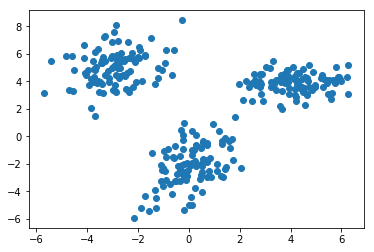

In [235]:
dnum=100

mean1 = np.array([0, -2]) # 平均を指定。
cov1 = np.array([[1, 0.7],[0.7, 2]]) # 共分散行列を指定。
x1, y1 = np.random.multivariate_normal(mean1, cov1, dnum).T 

mean2 = np.array([4, 4]) # 平均を指定。
cov2 = np.array([[1, -0.3],[0.7, 0.4]]) # 共分散行列を指定。
x2, y2 = np.random.multivariate_normal(mean2, cov2, dnum).T 

mean3 = np.array([-3, 5]) # 平均を指定。
cov3 = np.array([[0.8, -0.1],[1.0, 2]]) # 共分散行列を指定。
x3, y3 = np.random.multivariate_normal(mean3, cov3, dnum).T 

mean=np.array([mean1,mean2,mean3])
cov =np.array([cov1,cov2,cov3])
x = np.hstack([x1, x2, x3])
y = np.hstack([y1,y2,y3])
data=np.array([x,y]).T
plt.scatter(x,y)
plt.show()

## クラスタリング

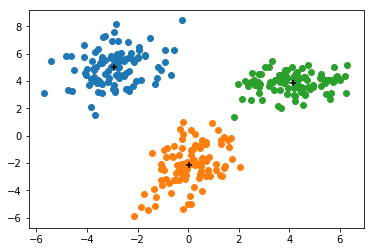

In [239]:
ncluster=3
km = KMeans(n_clusters=ncluster).fit(data) #本当はクラスタ数3は未知の情報，ここでは事前知識として与える
label = km.predict(data)
for i in range(ncluster):
        clust = data[label == i]
        plt.scatter(clust[:, 0], clust[:, 1])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="+",color="black")
# 3つのクラスタに分けられることを確認

## 各クラスタごとにマハラノビス距離で判定

In [240]:
ano=[]
for i in range(ncluster):
    clust = data[label == i] # クラスタi のデータ
    th= 3 #ここは適宜
    xv=clust[:, 0]
    yv=clust[:, 1]  
    pmean=[km.cluster_centers_[i,0],km.cluster_centers_[i,1]]
    pcov =np.cov(clust.T)
    for j,dummy in enumerate(xv):
    # データx, 平均値mean, 共分散行列の逆行列np.linalg.pinv(cov) から距離を計算
        d=distance.mahalanobis([xv[j], yv[j]], pmean, np.linalg.pinv(pcov))
        if d >=th:
            ano.append([xv[j], yv[j]]) 

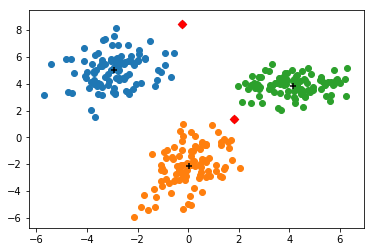

In [241]:
ano=np.array(ano)
for i in range(ncluster):
        clust = data[label == i]
        plt.scatter(clust[:, 0], clust[:, 1])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="+",color="black")
plt.scatter(ano[:,0],ano[:,1],color="red",marker="D")